# YOLO train pipeline

Prerequisites:
- set `~/Library/Application Support/Ultralytics/settings.yaml` (or `/home/jupyter/.config/Ultralytics/settings.yaml`) directories to current:
    - datasets_dir: /Users/alv.popov/prj/DL-CASE1/data
    - weights_dir: /Users/alv.popov/prj/DL-CASE1/weights
    - runs_dir: /Users/alv.popov/prj/DL-CASE1/runs
- create `data.zip` archive with [preprocess.ipynb](../preprocess.ipynb) or [download it](https://disk.yandex.ru/d/PcaXzpNr3IUsRg)

In [ ]:
!mkdir datasets
!unzip data.zip -d ./datasets

In [ ]:
!nvidia-smi

Tue Nov 28 15:18:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install numpy
!pip install ultralytics
!pip install matplotlib
!pip install pandas
!pip install torch

In [ ]:
%%bash
# Правим конфиг для обучения
# echo "settings_version: 0.0.4
# datasets_dir: /content/yolo/datasets
# weights_dir: /content/yolo/weights
# runs_dir: /content/yolo/runs
# uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
# sync: true
# api_key: ''
# clearml: true
# comet: true
# dvc: true
# hub: true
# mlflow: true
# neptune: true
# raytune: true
# tensorboard: true
# wandb: true" > /root/.config/Ultralytics/settings.yaml
yolo settings

💡 Learn about settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings
Printing '/root/.config/Ultralytics/settings.yaml'

settings_version: 0.0.4
datasets_dir: /content/datasets
weights_dir: weights
runs_dir: runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true



bash: line 17: /root/.config/Ultralytics/settings.yaml: No such file or directory


In [ ]:
from ultralytics import YOLO
import os
import shutil
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.0/78.2 GB disk)


In [ ]:
root_dir = '.'
data_dir = os.path.join(root_dir, 'datasets', 'data')
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [ ]:
model = YOLO('yolov8n.pt').to('cuda')

In [ ]:
model.train(data=os.path.join(root_dir, "yolo.yaml"), epochs=20, imgsz=640, device="0", plots=True, patience=5)
print('done')

In [ ]:
test_images_dir = os.path.join(test_dir, 'images')
images = list(map(lambda x: os.path.join(test_images_dir, x), os.listdir(test_images_dir)[:10]))
results = model(images)
len(results)


0: 480x640 (no detections), 1: 480x640 (no detections), 2: 480x640 (no detections), 3: 480x640 2 GIVE_WAYs, 4: 480x640 (no detections), 5: 480x640 (no detections), 6: 480x640 (no detections), 7: 480x640 (no detections), 8: 480x640 (no detections), 9: 480x640 (no detections), 108.5ms
Speed: 2.3ms preprocess, 10.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


10

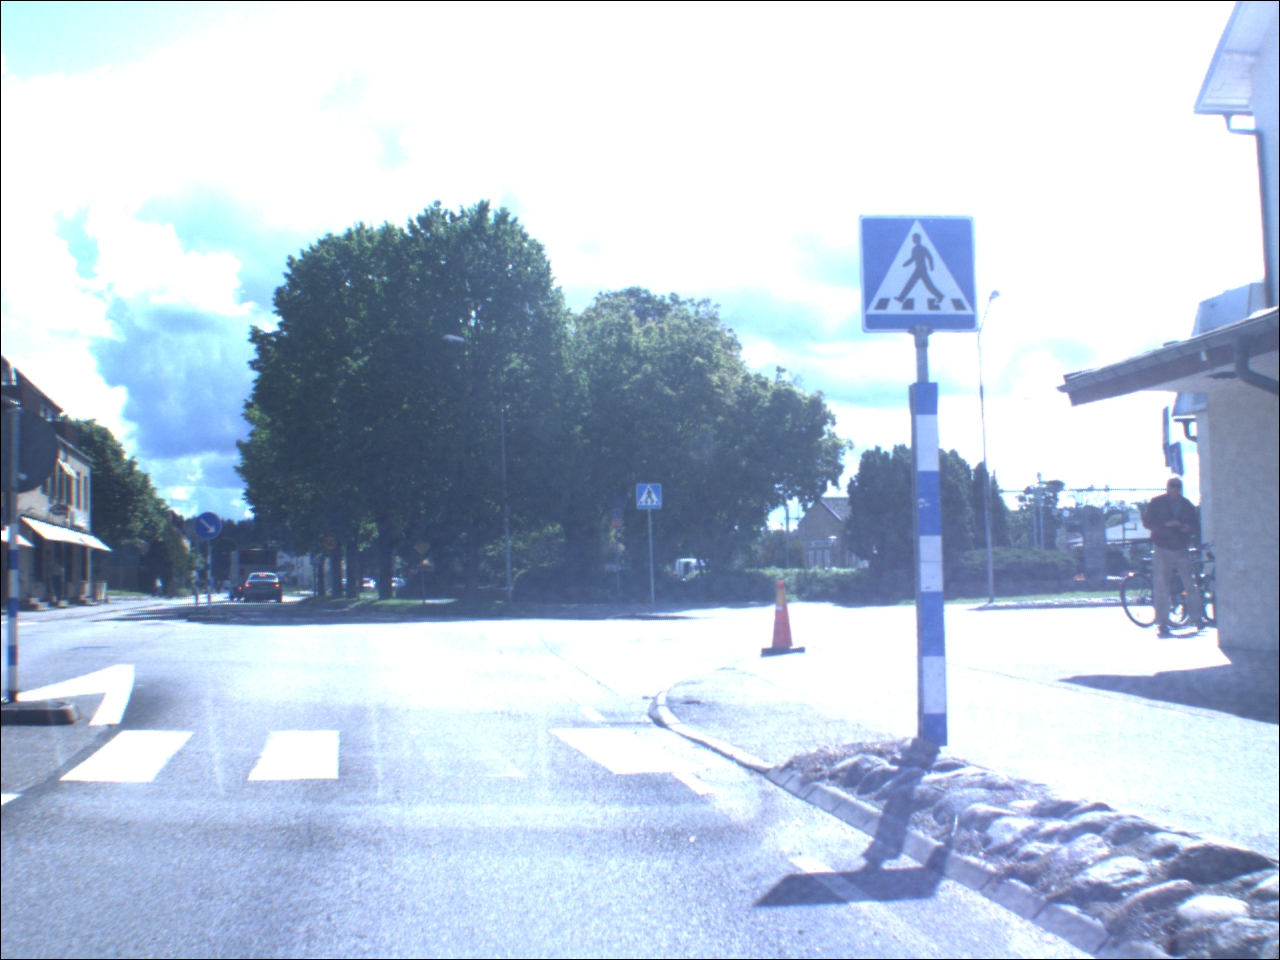

In [ ]:
# Show the results
r = results[6]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)  # show image

In [ ]:
r.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (960, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))